In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp "/content/drive/MyDrive/wheat_4.zip" "/content"

In [4]:
!mkdir wheat1

In [5]:
!unzip /content/wheat_4.zip -d "/content/wheat1"

Archive:  /content/wheat_4.zip
   creating: /content/wheat1/wheat_4/
   creating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/
   creating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/
   creating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_0.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_1.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_10.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_11.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_12.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_13.png  
  inflating: /content/wheat1/wheat_4/Wheat-Disease-Dataset/T

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [7]:
data_dir="/content/wheat1/wheat_4/Wheat-Disease-Dataset/Images"
data= tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 4506 files belonging to 4 classes.


In [8]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=10,
    validation_split=0.2  # Use for splitting the dataset into training and validation
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)


In [9]:
batch_size=32
image_size=(150,150)

In [10]:
# Training data generator
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Validation data generator
val_data= val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 3606 images belonging to 4 classes.
Found 1125 images belonging to 4 classes.


In [11]:
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'Brown Rust', 1: 'Healthy', 2: 'Smut', 3: 'Yellow Rust'}


In [12]:
def create_model(input_shape=(150, 150, 3), num_classes=4):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model()


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

In [14]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    epochs=40  # Adjust epochs based on your requirement
)


Epoch 1/40
112/112 [==============================] - 82s 644ms/step - loss: 0.5717 - accuracy: 0.8117 - val_loss: 32.8986 - val_accuracy: 0.2661
Epoch 2/40
112/112 [==============================] - 66s 590ms/step - loss: 0.3632 - accuracy: 0.8811 - val_loss: 9.1112 - val_accuracy: 0.2464
Epoch 3/40
112/112 [==============================] - 63s 567ms/step - loss: 0.3652 - accuracy: 0.8752 - val_loss: 6.5390 - val_accuracy: 0.2464
Epoch 4/40
112/112 [==============================] - 69s 613ms/step - loss: 0.3563 - accuracy: 0.8797 - val_loss: 3.1298 - val_accuracy: 0.4643
Epoch 5/40
112/112 [==============================] - 67s 599ms/step - loss: 0.2714 - accuracy: 0.8942 - val_loss: 2.8214 - val_accuracy: 0.5938
Epoch 6/40
112/112 [==============================] - 64s 573ms/step - loss: 0.2849 - accuracy: 0.9026 - val_loss: 0.3409 - val_accuracy: 0.8777
Epoch 7/40
112/112 [==============================] - 67s 599ms/step - loss: 0.2463 - accuracy: 0.9135 - val_loss: 0.3231 - val_a

In [16]:
# Save the model
model.save('wheat_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


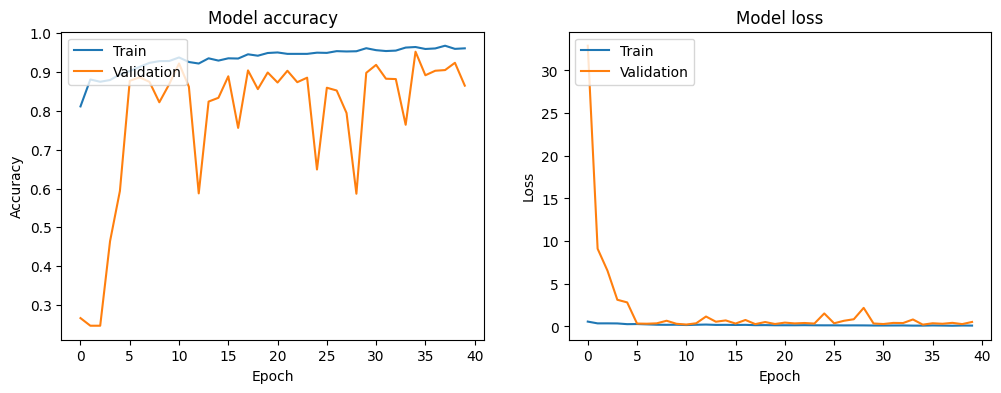

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for making predictions
)

y_pred_prob = model.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_data.classes


Found 1125 images belonging to 4 classes.
36/36 [==============================] - 16s 425ms/step


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
target_names = list(val_data.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

  Brown Rust       0.96      0.53      0.68       277
     Healthy       0.96      0.94      0.95       271
        Smut       0.67      0.98      0.80       277
 Yellow Rust       1.00      1.00      1.00       300

    accuracy                           0.86      1125
   macro avg       0.90      0.86      0.86      1125
weighted avg       0.90      0.86      0.86      1125



In [22]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[146   9 122   0]
 [  4 255  12   0]
 [  2   3 272   0]
 [  0   0   0 300]]


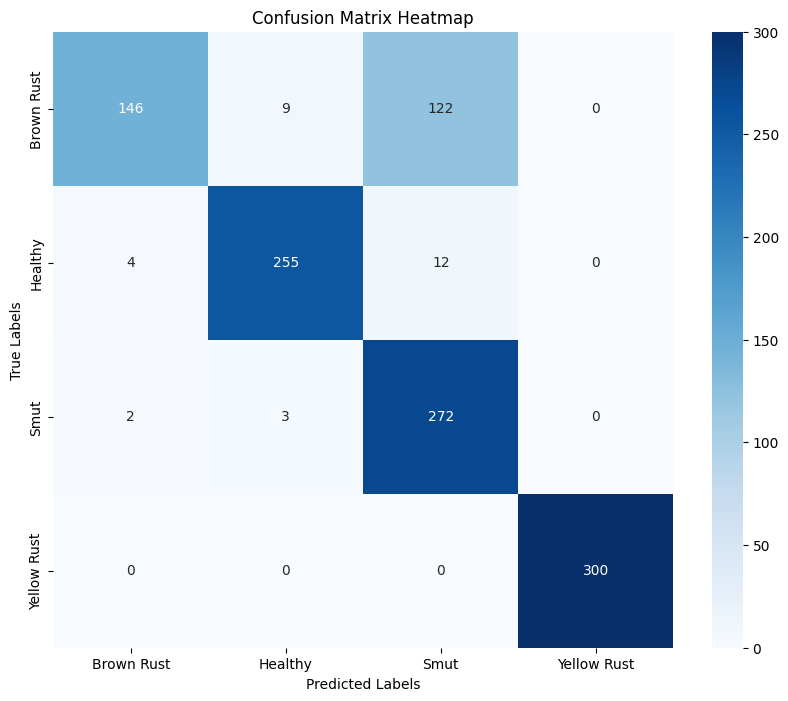

In [23]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [24]:
!cp "/content/wheat_cnn.h5" "/content/drive/MyDrive"

In [27]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
   classes.append(key)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(filename, model, image_size=(150, 150)):
    img = load_img(filename, target_size=image_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize the image data
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img)

1/1 [==============================] - 0s 58ms/step


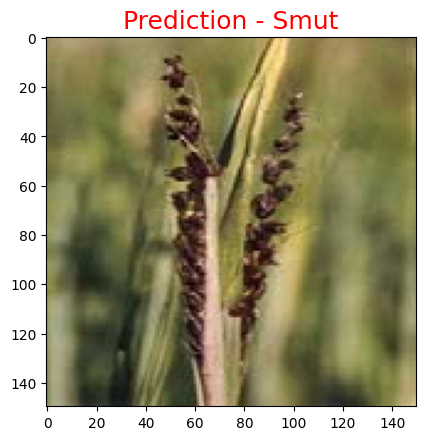

In [34]:
predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/smut_test/smut_test_34.png", model)

1/1 [==============================] - 0s 48ms/step


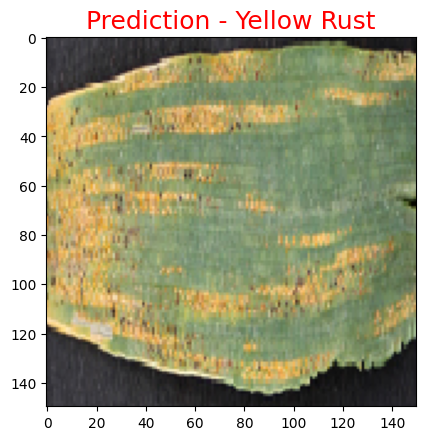

In [37]:
predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/yellow_rust_test/yellow_rust_test_4.png",model)

1/1 [==============================] - 0s 27ms/step


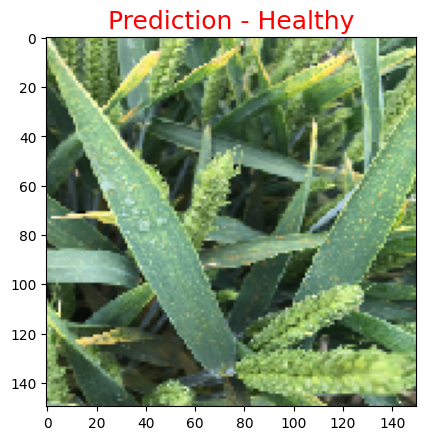

In [48]:
predict_image("/content/healthy.png",model)

1/1 [==============================] - 0s 33ms/step


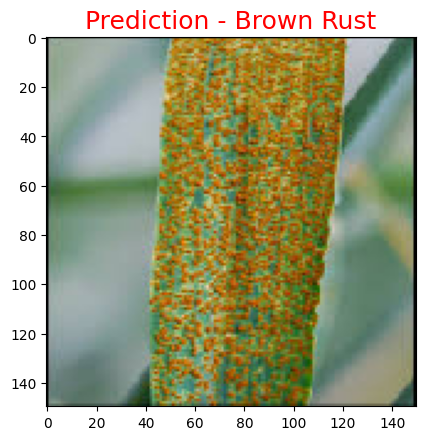

In [42]:
predict_image("/content/brown4.jpeg",model)

In [ ]:
# !cp "/content/drive/MyDrive/wheat_cnn.h5" "/content"

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model('/content/wheat_cnn.h5')

In [ ]:
# classes = ["Brown_rust","Healthy","Smut","Yellow_rust"]

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# def predict_image(filename, model, image_size=(150, 150)):
#     img = load_img(filename, target_size=image_size)
#     img_array = img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.  # Normalize the image data
#     prediction = model.predict(img_array)
#     index = np.argmax(prediction)
#     plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
#     plt.imshow(img)

In [ ]:
# predict_image("/content/wheat1/wheat_4/Wheat-Disease-Dataset/Testing/smut_test/smut_test_34.png", model)